## Introdução à Ciência de Dados - Universidade de São Paulo

# Questionário 4 - Regressão logística e KNN

##### Prof. Francisco Rodrigues - Aluno: Gean Gobo da Cruz - N° USP: 13661979


### Pacotes

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42)


### Dataset

In [2]:
url = (
"https://raw.githubusercontent.com/rocksaint/fruit-data-with-colours/master/fruit_data_with_colours.csv"
)

data = pd.read_csv(url)

### 1 - Considere os dados obtidos a partir do código a seguir. Encontre o melhor valor de k e a métrica de distância no algoritmo knn. A classe a ser considerada está na primeira (fruit_label) ou segunda coluna (fruit_name). A que não for usada, precisa ser removida. Notem que os atributos nominais precisam ser convertidos em numéricos usando OneHotEncoder

In [3]:
nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)
data.head(10)

Matriz de atributos: Número de linhas: 59  colunas:  7


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


#### Seleção de Features: Dado `fruit_label` já ser numérica, escolheremos como alvo y (excluindo `fruit_name`)

In [4]:
# Definindo o alvo (y) e as features (X)
# Vamos usar 'fruit_label' como nosso alvo por já ser numérico.
y = data['fruit_label']

# As features (X) são todas as colunas, exceto as de identificação da fruta.
X = data.drop(['fruit_label', 'fruit_name'], axis=1)

print("Features iniciais (X):")
print(X.head())

Features iniciais (X):
  fruit_subtype  mass  width  height  color_score
0  granny_smith   192    8.4     7.3         0.55
1  granny_smith   180    8.0     6.8         0.59
2  granny_smith   176    7.4     7.2         0.60
3      mandarin    86    6.2     4.7         0.80
4      mandarin    84    6.0     4.6         0.79


Note que ainda existe um atributo nominal, diante disso precisamos realizar a sua conversão pois o knn não funciona com nominais

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_subtype  59 non-null     object 
 1   mass           59 non-null     int64  
 2   width          59 non-null     float64
 3   height         59 non-null     float64
 4   color_score    59 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


### Conversão de Atributos Nominais (One-Hot Encoding)

In [6]:
# Aplicando One-Hot Encoding na coluna 'fruit_subtype'
X = pd.get_dummies(X, columns=['fruit_subtype'], drop_first=True)

print("\nFeatures após One-Hot Encoding:")
print(X.head())


Features após One-Hot Encoding:
   mass  width  height  color_score  fruit_subtype_cripps_pink  \
0   192    8.4     7.3         0.55                      False   
1   180    8.0     6.8         0.59                      False   
2   176    7.4     7.2         0.60                      False   
3    86    6.2     4.7         0.80                      False   
4    84    6.0     4.6         0.79                      False   

   fruit_subtype_golden_delicious  fruit_subtype_granny_smith  \
0                           False                        True   
1                           False                        True   
2                           False                        True   
3                           False                       False   
4                           False                       False   

   fruit_subtype_mandarin  fruit_subtype_selected_seconds  \
0                   False                           False   
1                   False                           False

### Divisão em Conjunto de Treino e Teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (47, 13)
Tamanho do conjunto de teste: (12, 13)


### Normalização dos Dados

In [8]:
scaler = StandardScaler()

# Ajusta o scaler com os dados de TREINO e os transforma
X_train_scaled = scaler.fit_transform(X_train)

# Apenas transforma os dados de TESTE com o scaler já ajustado
X_test_scaled = scaler.transform(X_test)

### Encontrando o Melhor k e a Melhor Métrica

In [9]:
# Lista de métricas a serem testadas
vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
# Range de valores de k para testar
k_range = range(1, 16) # Testa k de 1 a 15

# Estrutura para guardar os resultados
results = []

# Loop pelas métricas
for metric in vm:
    # Loop pelos valores de k
    for k in k_range:
        # 1. Cria o modelo KNN com a métrica e o k da iteração atual
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # 2. Treina o modelo com os dados de treino normalizados
        knn.fit(X_train_scaled, y_train)
        
        # 3. Faz predições nos dados de teste normalizados
        y_pred = knn.predict(X_test_scaled)
        
        # 4. Calcula a acurácia
        accuracy = accuracy_score(y_test, y_pred)
        
        # 5. Guarda o resultado
        results.append((metric, k, accuracy))

# Imprime alguns resultados para verificação
print("\nExemplo de resultados (métrica, k, acurácia):")
for i in range(5):
    print(results[i])


Exemplo de resultados (métrica, k, acurácia):
('euclidean', 1, 1.0)
('euclidean', 2, 1.0)
('euclidean', 3, 1.0)
('euclidean', 4, 1.0)
('euclidean', 5, 1.0)


### Análise dos resultados

In [10]:
# Converte os resultados para um DataFrame do Pandas para facilitar a análise
results_df = pd.DataFrame(results, columns=['Métrica', 'k', 'Acurácia'])

# Encontra a linha com a maior acurácia
best_result = results_df.loc[results_df['Acurácia'].idxmax()]

print("\n--- MELHOR RESULTADO ---")
print(best_result)


--- MELHOR RESULTADO ---
Métrica     euclidean
k                   1
Acurácia          1.0
Name: 0, dtype: object


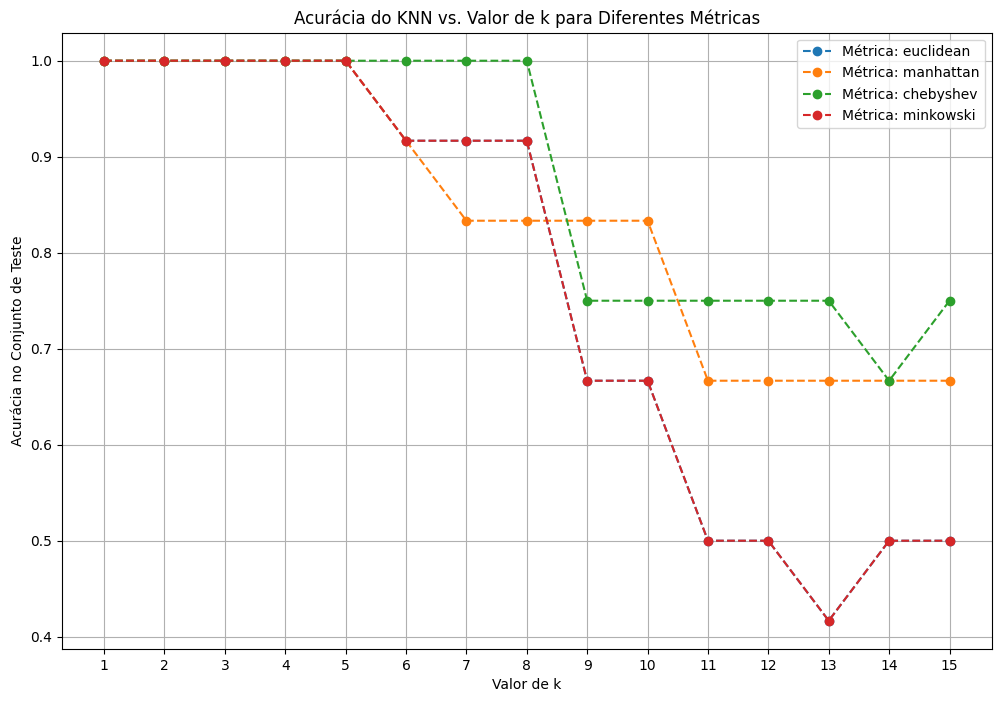

In [11]:
plt.figure(figsize=(12, 8))

for metric in vm:
    # Filtra o DataFrame para a métrica atual
    metric_df = results_df[results_df['Métrica'] == metric]
    plt.plot(metric_df['k'], metric_df['Acurácia'], marker='o', linestyle='--', label=f'Métrica: {metric}')

plt.title('Acurácia do KNN vs. Valor de k para Diferentes Métricas')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia no Conjunto de Teste')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

Note o "trade-off viés-variância" atuando, existe uma queda da acurácia com aumento de `k`: 
- `k` pequeno (baixo viés, alta variância) --> Se adapta aos dados de treino (não aprende e sim cria uma fronteira de decisão complexa e irregular), poucas suposições e risco de overfitting.
- `k` grande (alto viés, baixa variância) --> Modelo rígido, menos sensível, alto viés e underfitting. 

### 2. Faça a classificação usando regressão logística


Poderíamos definir a função sigmoide usando numpy para operações matemáticas, mas já existe um módulo pronto no Scikit-learn

In [12]:
from sklearn.linear_model import LogisticRegression

### Treinando o Modelo de Regressão Logística
Dado que já fizemos a preparacão dos dados no último exercício, vamos treinar o modelo.

obs: Diferente do KNN que apenas "memoriza" os dados, a Regressão Logística aprende os melhores coeficientes (pesos) para cada feature, de forma a criar uma fronteira de decisão linear que melhor separe as classes.


In [13]:
log_reg = LogisticRegression(random_state=42) # random_state para reprodutibilidade

print("Treinando o modelo de Regressão Logística...")
log_reg.fit(X_train_scaled, y_train)
print("Modelo treinado com sucesso!")

Treinando o modelo de Regressão Logística...
Modelo treinado com sucesso!


### Fazendo Previsões e Avaliando o Modelo

In [15]:
# Fazer previsões nos dados de TESTE normalizados
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Avaliar a performance do modelo

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"\nAcurácia da Regressão Logística: {accuracy:.4f}")

print(f"\n Relatório de Classificação: \n{classification_report(y_test, y_pred_log_reg)}")


Acurácia da Regressão Logística: 1.0000

 Relatório de Classificação: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



### Conclusão: 
- Note que o KNN (com um valor de k baixo) e a Reg. Log. se mostraram eficazes com 100% de acurácia no conjunto de teste; 
- Isso indica que as frutas desse dataset são linearmente separáveis, isto é, são tão distintas as caracteristicas das frutas que é possível traçar uma fronteira de decisão simples.  